In [ ]:
# Importando bibliotecas
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Inputs

In [ ]:
# Parâmetros do sistema
m1 =  5.0 # massa 1 (kg)
m2 = 10.0 # massa 2 (kg)
k1 = 50.0 # constante da mola 1 (N/m)
k2 = 10.0 # constante da mola 2 (N/m)
k3 =  5.0 # constante da mola 3 (N/m)
x1 = 1.00 # posição inicial da massa 1 (m)
x2 = 0.00 # posição inicial da massa 2 (m)
v1 = 0.00 # velocidade inicial da massa 1 (m/s)
v2 = 0.00 # velocidade inicial da massa 2 (m/s)

In [ ]:
# Explanação dos valores sugeridos
print("DADOS DE ENTRADA:\n")
print("Valores Sugeridos:")
print("Massas: m1 = 5 [kg], m2 = 10 [kg]")
print("Constantes de amortecimento: k1 = 50 [N/m], k2 = 10 [N/m], k3 = 5 [n/m]")
print("Condições iniciais: x1 = 1 [m], x2 = 0 [m], v1 = 0 [m/s], v2 = 0 [m/s]")

# Perguntar se o usuário deseja usar tais valores ou definir manualmente
continuar =  input("\nDeseja continuar com tais valores? Informar [S] para continuar ou [N] para inserir outros: ").upper()
print()

if continuar == 'S':
  print("Valores mantidos.")

elif continuar == 'N':
  # Massas
  m1 = float(input("Digite a massa 1 (m1) [kg]: "))
  m2 = float(input("Digite a massa 1 (m1) [kg]: "))
  print()
  # Constantes de amortecimento
  k1 = float(input("Digite a constante de amortecimento 1 (k1) [N/m]: "))
  k2 = float(input("Digite a constante de amortecimento 1 (k1) [N/m]: "))
  k3 = float(input("Digite a constante de amortecimento 1 (k1) [N/m]: "))
  print()
  # Posição inicial
  x1 = float(input("Digite a posição inicial massa 1 (x1) [m]: "))
  x2 = float(input("Digite a posição inicial massa 2 (x2) [m]: "))
  print()
  # Velocidade inicial
  v1 = float(input("Digite a velocidade inicial massa 1 (v1) [m/s]: "))
  v2 = float(input("Digite a velocidade inicial massa 2 (v2) [m/s]: "))
  print()
  print("Valores inseridos.")

else:
  print("Resposta não reconhecida.")

DADOS DE ENTRADA:

Valores Sugeridos:
Massas: m1 = 5 [kg], m2 = 10 [kg]
Constantes de amortecimento: k1 = 50 [N/m], k2 = 10 [N/m], k3 = 5 [n/m]
Condições iniciais: x1 = 1 [m], x2 = 0 [m], v1 = 0 [m/s], v2 = 0 [m/s]

Deseja continuar com tais valores? Informar [S] para continuar ou [N] para inserir outros: s

Valores mantidos.


# Cálculos

## Frequência angular, Amplitudes e ângulos de fase

In [ ]:
# Matriz de massa
M = np.array([[m1, 0],
              [0, m2]])

# Matriz de rigidez
K = np.array([[k1 + k2, -k2],
              [-k2, k2 + k3]])

In [ ]:
# Inverter M e calcular autovalores e autovetores para M^(-1) * K
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M).dot(K))

# As frequências naturais (ω) são a raiz quadrada dos autovalores
omega_natural = np.sqrt(eigvals)

# Amlitudes para os dois primeiros modos de vibração (autovetores)
modos_vibracao = eigvecs

# Condições iniciais para determinar os ângulos de fase
X0 = np.array([x1, x2])
V0 = np.array([v1, v2])

# Ângulos de fase (derivada da solução, velocidades)
fases = np.arctan2(np.dot(modos_vibracao.T, V0), np.dot(omega_natural * modos_vibracao.T, X0))

## Equação do movimento

In [ ]:
# Função para resolver as equações de movimento usando odeint
def equations(Y, t, m1, m2, k1, k2, k3):
    x1, x2, v1, v2 = Y

    # Equações diferenciais
    dx1dt = v1
    dx2dt = v2

    dv1dt = -(k1 + k2) / m1 * x1 + (k2 / m1 * x2)
    dv2dt = -(k2 + k3) / m2 * x2 + (k2 / m2 * x1)

    return [dx1dt, dx2dt, dv1dt, dv2dt]

In [ ]:
# Condições iniciais: [posição inicial de x1, posição inicial de x2, velocidade inicial de x1, velocidade inicial de x2]
Y0 = [x1, x2, v1, v2]

# Tempo para a simulação
t = np.linspace(0, 10)

# Resolver as equações diferenciais
sol = odeint(equations, Y0, t, args=(m1, m2, k1, k2, k3))

# Extraindo as posições x1(t) e x2(t)
x1_t = sol[:, 0]
x2_t = sol[:, 1]

# Resultados

In [ ]:
# Exibir frequências naturais
print("ω1 =", omega_natural[0])
print("ω2 =", omega_natural[1])
print()

# Exibir amplitudades para cada modo de vibração
print("A1 =", modos_vibracao[0])
print("A2 =", modos_vibracao[1])
print()

# Exibir ângulos de fase
print("ϕ1 =", fases[0])
print("ϕ2 =", fases[1])

ω1 = 3.491008563829783
ω2 = 1.1458006839180686

A1 = [0.99565083 0.18394744]
A2 = [-0.09316344  0.98293608]

ϕ1 = 0.0
ϕ2 = 0.0


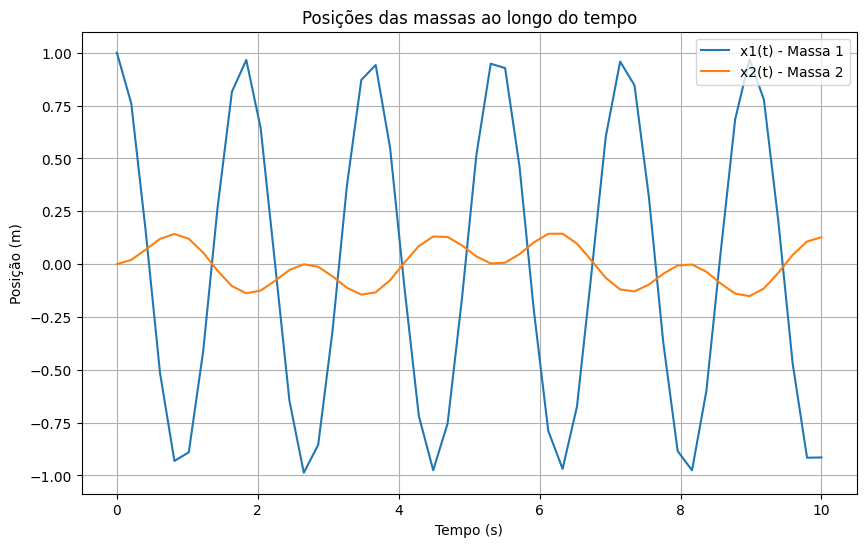

In [ ]:
# Plotar os resultados das posições
plt.figure(figsize=(10, 6))
plt.plot(t, x1_t, label='x1(t) - Massa 1')
plt.plot(t, x2_t, label='x2(t) - Massa 2')
plt.title('Posições das massas ao longo do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.legend()
plt.grid(True)
plt.show()